# Data overview for Final Project - Parking Spaces in CPH

The available parking spaces and their occupancy are counted in Copenhagen and the data sets are available on [Opendata](https://www.opendata.dk). There are two datasets available: 
- **Parking spaces**: The data set shows legal parking spaces during the day (7am-6pm) at street level (on public and private shared roads), parking spaces in publicly owned parking facilities as well as parking spaces without a parking system. Parking options for electric cars, shared cars, taxis and disabled drivers appear. Also includes parking spaces reserved for embassies and consulates.

The data sets will be analyzed and preprocessed in the following cells.

## Preamble

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

# Set pandas display options to show all columns for .head command
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", None)        # Auto-detect the display width
pd.set_option("display.max_colwidth", None) # Show full content of each column

# Loading the data and files
data_path = os.path.abspath(os.path.join(os.pardir, "projectData"))

# Load csv data into pandas dataframe
parking_spaces_name = "parking_spaces.csv"
parking_spaces_path = os.path.join(data_path, parking_spaces_name)
df = pd.read_csv(parking_spaces_path)


## Cleaning the data

### Data overview

The original dataset from Opendata contains 26 columns and 28762 rows.

| Original Column name              | Renamed Column name           | Description   |
| ------                            | ------                        | ------        |
|**FID**                            | NaN                           | Identifier for Parking Space Object strictly used for this dataset|
|**vejkode**                        | street_code                   | Numeric Identifier for a given street |
|**vejnavn**                        | street_name                   | Street name|
|**antal_pladser**                  | no_of_spaces                  | Number of parking spaces registered under Parking Space Object |
|**restriktion**                    | restriction                   | Restriction boolean indicator |
|**vejstatus**                      | NaN                           | Street type, e.g. public road or private area |
|**vejside**                        | NaN                           | Side of the road, i.e. even or odd numbered house numbers |
|**bydel**                          | district                      | District, e.g. Nørrebro, Valby, etc. |
|**p_ordning**                      | parking_type                  | Parking Space Object type, e.g. Electric car parking w. charger, Handicap, Blue zone, etc. |
|**p_type**                         | NaN                           | Parking Space Object physical type, e.g. Marked parking, 45deg marked parking, |
|**p_status**                       | NaN                           | Status of whether the parking spot is "created" or "temporarily out of service" |
|**rettelsedato**                   | date_correction               | Date of correction |
|**oprettelsesdato**                | date_creation                 | Date of creation |
|**x**                              | NaN                           | Individual Text description for Parking Space Object type, e.g. license plate for private handicap parking spot |
|**id**                             | NaN                           | Unique Identifer for each Parking Space Object |
|**taelle_id**                      | NaN                           | Identifier for internal counting/tally procedures
|**startdato_midlertidigt_nedlagt** | NaN                           | Start date for registered Out of Service (only NaN in dataset) |
|**slutdato_midlertidigt_nedlagt**  | NaN                           | End date for registered Out of Service (only NaN and a single entry in dataset) |
|**restriktionstype**               | restriction_type              | Restriction type name |
|**restriktionstekst**              | restriction_text              | Restriction description, e.g. "8-18" if parking not allowed in given hours |
|**taelle_note**                    | NaN                           | Text notes for internal counting/tally procedures |
|**delebilsklub**                   | NaN                           | Car sharing company |
|**aendring_p_ordning**             | changed_to_electric_parking   | Indicator if parking space has been converted to Electric parking w.o. charger |
|**uuid**                           | NaN                           | Unique Identifer for each Parking Space Object |
|**ogc_fid**                        | NaN                           | Numeric Identifier for Parking Space Object strictly used for this dataset|
|**wkb_geometry**                   | NaN                           | Location of Parking Space Object, in the form of a MultiLineString with altitude/longitude coordinates |

In [71]:
# Quick overview of some value examples
# for col in df.columns:
#     l = list(df[col].unique())
#     l_len = len(l)
#     if l_len > 10:
#         l = l[:10]
#     print(col, "\n", l, "\nLen:\n", l_len, "\n")


for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}' has {len(unique_vals)} unique entries:")
    print(unique_vals)
    print("-" * 40)

FID' has 28762 unique entries:
['p_pladser.1' 'p_pladser.2' 'p_pladser.3' ... 'p_pladser.28760'
 'p_pladser.28761' 'p_pladser.28762']
----------------------------------------
vejkode' has 2008 unique entries:
[   4    8   72 ... 8847 8848 9802]
----------------------------------------
vejnavn' has 2008 unique entries:
['Abel Cathrines Gade' 'Abildgaardsgade' 'Ahrenkildes Allé' ...
 'Burgundyvej' 'Paradisæblevej' 'Frederikssundsvejtunnelen']
----------------------------------------
antal_pladser' has 71 unique entries:
[ 10.   4.   1.   2.   3.  11.  13.   8.   5.   7.   6.  29.  20.  16.
   9.  12.  14.  31.  26.  51.  30.  15.  32.  33.  nan  18.  17.  23.
  24.  35.  47.  19.  28.  25. 191.  21.  38.   0.  22.  27.  37.  36.
  54.  49.  52.  34.  82.  83.  46.  44.  40.  61.  41.  66.  39. 407.
  42.  69. 164.  62.  45.  73.  56.  58.  57.  55.  67. 266.  50. 155.
  53.]
----------------------------------------
restriktion' has 3 unique entries:
['nej' 'ja' nan]
---------------------

In [72]:
# Drop redundant columns
df_dropped = df.drop(
    columns=[
        "FID",
        #"vejkode",
        #"vejnavn",
        #"antal_pladser",
        #"restriktion",
        "vejstatus",
        "vejside",
        #"bydel",
        #"p_ordning",
        "p_type",
        "p_status",
        #"rettelsedato",
        #"oprettelsesdato",
        "x",
        "id",
        "taelle_id",
        "startdato_midlertidigt_nedlagt",
        "slutdato_midlertidigt_nedlagt",
        #"restriktionstype",
        #"restriktionstekst",
        "taelle_note",
        "delebilsklub",
        #"aendring_p_ordning",
        "uuid",
        "ogc_fid",
        #"wkb_geometry",
    ], errors='ignore')

# Drop any rows which do not contain quantifiable informations
df_dropped = df_dropped.dropna(subset=[
    "antal_pladser",
    "bydel",
    "wkb_geometry"
])

### Renaming columns and changing the types

In [73]:
# Rename columns to English and more specific naming
cols_rename = {
    "vejkode": "street_code",
    "vejnavn": "street_name", 
    "antal_pladser": "no_of_spaces",
    "restriktion": "restriction",
    "bydel": "district",
    "p_ordning": "parking_type",
    "rettelsedato": "date_correction", 
    "oprettelsesdato": "date_creation",
    "restriktionstype": "restriction_type",
    "restriktionstekst": "restriction_text",
    "aendring_p_ordning": "changed_to_electric_parking",
}
df_renamed = df_dropped.copy()
df_renamed.rename(columns=cols_rename, inplace=True)

# Convert to bool values and fill NaN with False
df_renamed["restriction"] = df_renamed["restriction"].map({"ja": np.True_, "nej": np.False_})
df_renamed["restriction"] = df_renamed["restriction"].fillna(np.False_)

df_renamed["changed_to_electric_parking"] = df_renamed["changed_to_electric_parking"].map({"El-delebil-plads uden ladestandere": np.True_})
df_renamed["changed_to_electric_parking"] = df_renamed["changed_to_electric_parking"].fillna(np.False_)

# Reorder the columns for better reading
df_renamed = df_renamed[[
    "street_code", 
    "street_name",
    "district", 
    "no_of_spaces", 
    "parking_type",
    "changed_to_electric_parking", 
    "restriction", 
    "restriction_type", 
    "restriction_text",
    "date_creation",
    "date_correction",
    "wkb_geometry"
]]

# Define the conversion dictionary
convert_dict = {
    "street_code": int, 
    "street_name": str,
    "district": str, 
    "no_of_spaces": int, 
    "parking_type": str,
    "changed_to_electric_parking": bool, 
    "restriction": bool, 
    "restriction_type": str, 
    "restriction_text": str,
    "wkb_geometry": str   
}

# Convert columns using the dictionary
df_renamed = df_renamed.astype(convert_dict)

/tmp/ipykernel_6447/1772042899.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_renamed["restriction"] = df_renamed["restriction"].fillna(np.False_)
/tmp/ipykernel_6447/1772042899.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_renamed["changed_to_electric_parking"] = df_renamed["changed_to_electric_parking"].fillna(np.False_)


### Extract year of creation and correction

In [74]:
# Manual extraction of years from creation and correction date columns
df_renamed["year_creation"] = df_renamed["date_creation"].str.slice(0, 4).astype(str)
df_renamed["year_correction"] = df_renamed["date_correction"].str.slice(0, 4).astype(str)

In [75]:
# Edge case found with invalid year of creation registered! Errorvalue: "0200"
df_renamed[
    (df_renamed["year_creation"]=="0200")
    & (df_renamed["street_name"]=="Søren Norbys Allé")
][:1] # Example row

,street_code,street_name,district,no_of_spaces,parking_type,changed_to_electric_parking,restriction,restriction_type,restriction_text,date_creation,date_correction,wkb_geometry,year_creation,year_correction
23743,7320,Søren Norbys Allé,Amager Vest,5,"Privat ordning, privat fællesvej",False,False,nan,nan,0200-01-28T00:00:00,2022-10-11T14:14:14.947,"MULTILINESTRING ((12.60496312922993 55.65635253258871, 12.604996653006282 55.65634621531351, 12.605048348304837 55.656337576104825, 12.605123916832229 55.65632978457483, 12.605199101537195 55.656326416243495, 12.60525307681842 55.65632585745175, 12.605286030747786 55.656326875908924, 12.605369210644334 55.656330433159276))",0200,2022


In [76]:
# Replace errorvalue with default year chosen
DEFAULT_START_YEAR = "2003"
df_renamed.replace(to_replace={"year_creation": "0200"}, value={"year_creation" : DEFAULT_START_YEAR}, inplace=True)

# Drop the dates as we are only interested in the years
df_renamed = df_renamed.drop(columns=["date_creation", "date_correction"], errors='ignore')

### Convert geometry data for easier manipulation

In [77]:
# Drop duplicates based on location coordinates
subset = df_renamed[
    df_renamed.duplicated(subset=['wkb_geometry'])
]
df_renamed = pd.concat([df_renamed, subset, subset]).drop_duplicates(keep=False)

# Helper function to convert the Multilinestring format to a list of tuples
def multilinestring_to_tuplelist(s):
    matches = re.findall(r'[-\d\.]+ [-\d\.]+', s)
    coord_list = []
    for match in matches:
        lon, lat = map(float, match.split())
        coord_list.append((lat, lon))
    return coord_list

# Create new columns with parking space coordinates as list of tuples
df_renamed["coordinates"] = df_renamed["wkb_geometry"].apply(multilinestring_to_tuplelist)

# Drop the original geometry column
df_renamed = df_renamed.drop(columns=["wkb_geometry"], errors='ignore')

### Extract geographical data for separate dataset

In [78]:
# Only include relevant columns
df_geo = df_renamed[[
    "street_code",
    "street_name",
    "district",
    "no_of_spaces",
    "year_creation",
    "year_correction",
    "coordinates"
]].copy()
df_geo.reset_index(drop=True, inplace=True)

# Store geographical dataframe to new csv file
cleaned_name_geo = "parking_space_locations.csv"
cleaned_path_geo = os.path.join(data_path, cleaned_name_geo)
df_geo.to_csv(cleaned_path_geo, index=False)

# Drop coordinates in initial dataframe
df_renamed = df_renamed.drop(columns=["coordinates"], errors='ignore')

### Generate rows for each year a parking space has existed

In [79]:
# Traverse dataframe and duplicate entries for each year since they were registered as created
data = []
for index, row in df_renamed.iterrows():
    start_y = int(row["year_creation"])
    end_y = 2025
    for y in range(start_y, end_y+1):
        data.append([*row.tolist(), str(y)])

# Create dataframe from generated data
df_yearly = pd.DataFrame(columns=[*list(df_renamed.columns), "year_active"], data=data)
df_yearly.reset_index(drop=True, inplace=True)

# Store yearly dataframe to new csv file
cleaned_name_yearly = "parking_space_yearly_entries.csv"
cleaned_path_yearly = os.path.join(data_path, cleaned_name_yearly)
df_yearly.to_csv(cleaned_path_yearly, index=False)

## Statistics on cleaned data

district,Amager Vest,Amager Øst,Bispebjerg,Brønshøj-Husum,Indre By,Nørrebro,Valby,Vanløse,Vesterbro-Kongens Enghave,Østerbro
year_active,,,,,,,,,,
2003,3156.0,1846.0,NaN,NaN,9544.0,9735.0,NaN,1141.0,4926.0,11809.0
2004,5086.0,12260.0,10105.0,918.0,9982.0,9944.0,156.0,1286.0,8029.0,14755.0
2005,5405.0,13748.0,10151.0,1279.0,10040.0,10017.0,11128.0,3246.0,8258.0,14926.0
2006,9684.0,13843.0,10186.0,1296.0,10172.0,10102.0,11489.0,6593.0,8307.0,15120.0
2007,10172.0,13859.0,10276.0,11328.0,10245.0,10149.0,11542.0,10088.0,8321.0,15301.0
2008,10389.0,13915.0,10330.0,11343.0,10267.0,10299.0,11612.0,10150.0,8497.0,15341.0
2009,10452.0,13988.0,10399.0,11527.0,10427.0,10358.0,11690.0,10157.0,8590.0,15434.0
2010,10499.0,14007.0,10410.0,11530.0,10464.0,10430.0,11725.0,10185.0,8912.0,15607.0
2011,10512.0,14055.0,10413.0,11530.0,10493.0,10470.0,11743.0,10198.0,9028.0,15649.0


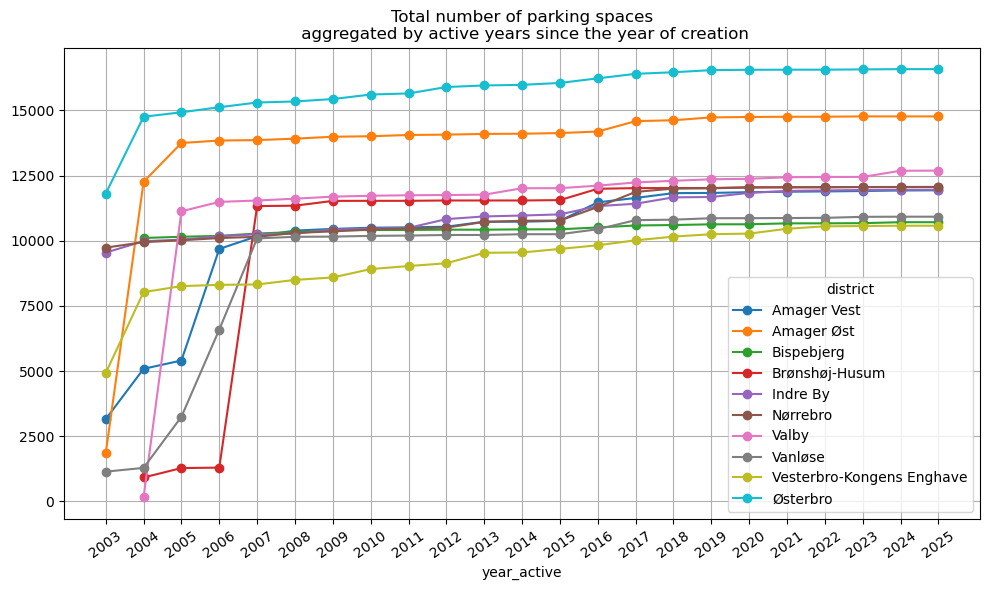

In [80]:
col_of_interest = "year_active"

# Group rows to count the total number of spaces
df_grouped = df_yearly.groupby([col_of_interest, "district"])["no_of_spaces"].sum().reset_index()
df_pivot = df_grouped.pivot(index=col_of_interest, columns="district", values="no_of_spaces")
display(df_pivot)

# Plot pivotted dataframe as lines
df_pivot.index = df_pivot.index.astype(int)
ax = df_pivot.plot(kind="line", marker='o', figsize=(10, 6))
   
# Force all years to show on the x-axis
ax.set_xticks(df_pivot.index)  # these are your actual year values
ax.set_xticklabels(df_pivot.index, rotation=35)  # rotate for readability

# Set title, labels, legeng and grid
plt.grid(visible=True)

plt.title("Total number of parking spaces\n aggregated by active years since the year of creation")

plt.tight_layout()
plt.show()

district,Amager Vest,Amager Øst,Bispebjerg,Brønshøj-Husum,Indre By,Nørrebro,Valby,Vanløse,Vesterbro-Kongens Enghave,Østerbro
year_creation,,,,,,,,,,
2003,10994.0,9913.0,NaN,NaN,15801.0,17043.0,NaN,4968.0,12926.0,16307.0
2004,6688.0,17182.0,20196.0,4730.0,3344.0,2112.0,1716.0,726.0,12232.0,9372.0
2005,2772.0,5166.0,504.0,2688.0,315.0,714.0,17493.0,3717.0,3234.0,1386.0
2006,6260.0,1740.0,400.0,260.0,1340.0,600.0,3360.0,9860.0,660.0,1180.0
2007,2261.0,133.0,627.0,16948.0,608.0,456.0,418.0,5263.0,114.0,1881.0
2008,1422.0,630.0,882.0,54.0,108.0,1908.0,684.0,666.0,1854.0,180.0
2009,629.0,969.0,884.0,1785.0,425.0,425.0,782.0,102.0,1105.0,816.0
2010,48.0,240.0,48.0,16.0,240.0,560.0,368.0,240.0,1984.0,2400.0
2011,150.0,645.0,15.0,NaN,45.0,345.0,150.0,150.0,450.0,450.0


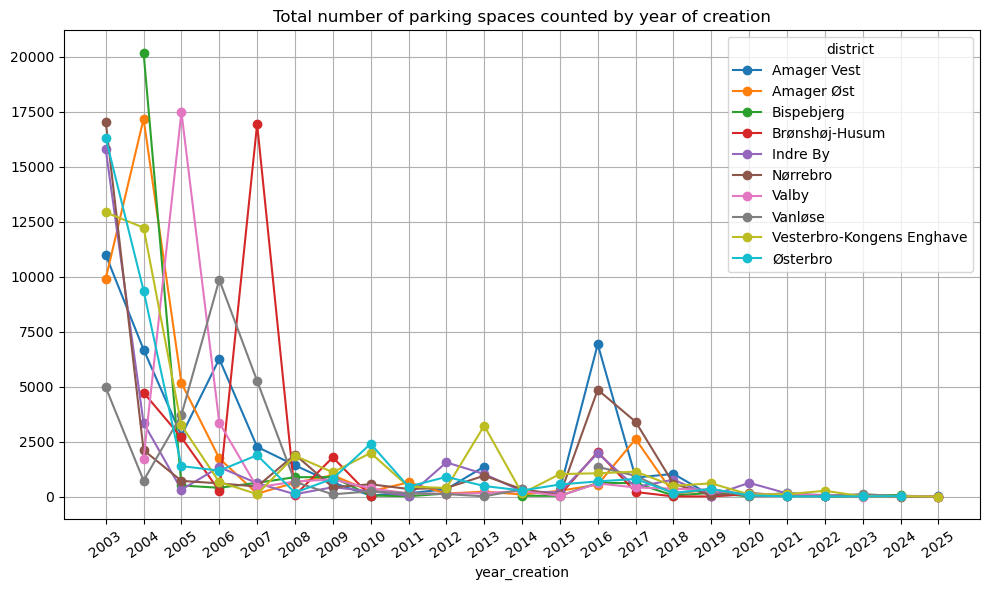

In [81]:
col_of_interest = "year_creation"

# Drop duplicates based on original unique entries
df_unique = df_yearly.drop_duplicates(subset=[col_of_interest, "year_active", "district", "no_of_spaces"])

# Group rows to count the total number of spaces
df_grouped = df_unique.groupby([col_of_interest, "district"])["no_of_spaces"].sum().reset_index()
df_pivot = df_grouped.pivot(index=col_of_interest, columns="district", values="no_of_spaces")
display(df_pivot)

# Plot pivotted dataframe as lines
df_pivot.index = df_pivot.index.astype(int)
ax = df_pivot.plot(kind="line", marker='o', figsize=(10, 6))
   
# Force all years to show on the x-axis
ax.set_xticks(df_pivot.index)  # these are your actual year values
ax.set_xticklabels(df_pivot.index, rotation=35)  # rotate for readability

# Set title, labels, legeng and grid
plt.grid(visible=True)

plt.title("Total number of parking spaces counted by year of creation")

plt.tight_layout()
plt.show()

district,Amager Vest,Amager Øst,Bispebjerg,Brønshøj-Husum,Indre By,Nørrebro,Valby,Vanløse,Vesterbro-Kongens Enghave,Østerbro
year_correction,,,,,,,,,,
2012,6342.0,1791.0,13926.0,12934.0,220.0,NaN,6801.0,2247.0,NaN,902.0
2013,180.0,22.0,660.0,383.0,NaN,NaN,101.0,NaN,NaN,NaN
2014,NaN,NaN,738.0,1390.0,NaN,NaN,NaN,NaN,NaN,NaN
2015,722.0,88.0,1958.0,703.0,NaN,NaN,294.0,665.0,NaN,NaN
2016,360.0,85.0,414.0,6239.0,NaN,NaN,1492.0,NaN,NaN,NaN
2017,680.0,63.0,106.0,455.0,NaN,NaN,44.0,76.0,22.0,NaN
2018,560.0,46.0,154.0,2276.0,NaN,NaN,2436.0,273.0,NaN,NaN
2019,246.0,604.0,1606.0,2170.0,19.0,NaN,1596.0,57.0,NaN,60.0
2020,3779.0,2604.0,1760.0,4752.0,1078.0,NaN,2436.0,809.0,NaN,24.0


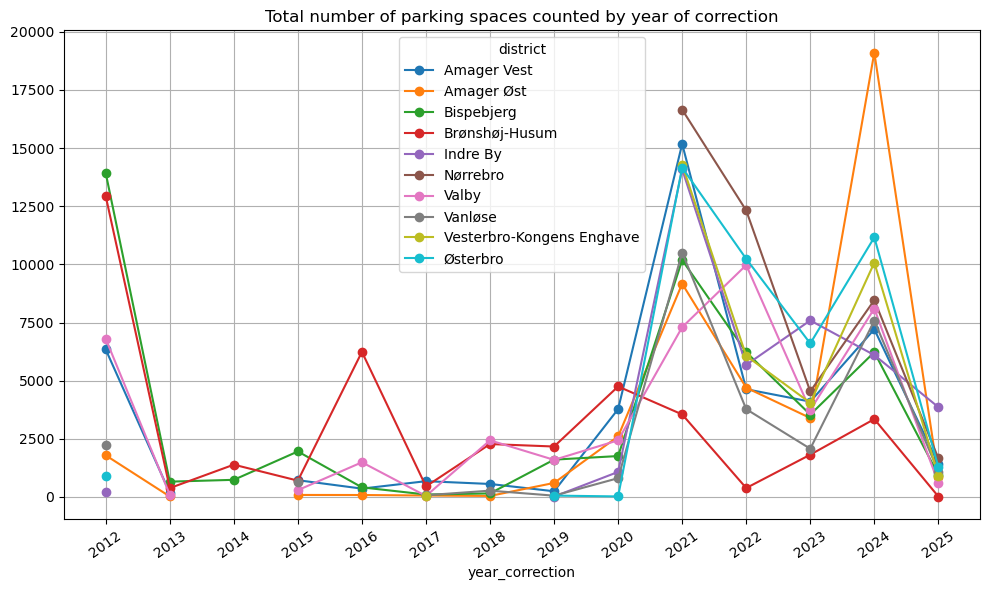

In [82]:
col_of_interest = "year_correction"

# Drop duplicates based on original unique entries
df_unique = df_yearly.drop_duplicates(subset=[col_of_interest, "year_active", "district", "no_of_spaces"])

# Group rows to count the total number of spaces
df_grouped = df_unique.groupby([col_of_interest, "district"])["no_of_spaces"].sum().reset_index()
df_pivot = df_grouped.pivot(index=col_of_interest, columns="district", values="no_of_spaces")
display(df_pivot)

# Plot pivotted dataframe as lines
df_pivot.index = df_pivot.index.astype(int)
ax = df_pivot.plot(kind="line", marker='o', figsize=(10, 6))
   
# Force all years to show on the x-axis
ax.set_xticks(df_pivot.index)  # these are your actual year values
ax.set_xticklabels(df_pivot.index, rotation=35)  # rotate for readability

# Set title, labels, legeng and grid
plt.grid(visible=True)

plt.title("Total number of parking spaces counted by year of correction")

plt.tight_layout()
plt.show()

changed_to_electric_parking,False,True
year_active,,
2003,42065,92
2004,72401,120
2005,88058,140
2006,96652,140
2007,111129,152
2008,111991,152
2009,112870,152
2010,113617,152
2011,113939,152


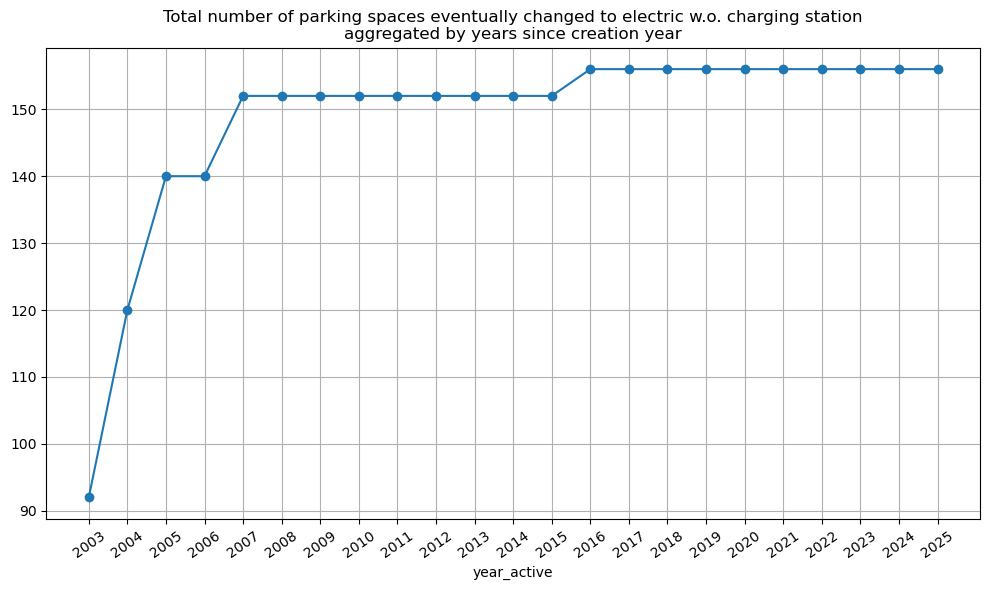

In [83]:
col_of_interest = "year_active"

# Group rows to count the total number of spaces
df_grouped = df_yearly.groupby([col_of_interest, "changed_to_electric_parking"])["no_of_spaces"].sum().reset_index()
df_pivot = df_grouped.pivot(index=col_of_interest, columns="changed_to_electric_parking", values="no_of_spaces")
display(df_pivot)

# Plot pivotted dataframe as lines
df_pivot.index = df_pivot[True].index.astype(int)
ax = df_pivot[True].plot(kind="line", marker='o', figsize=(10, 6))
   
# Force all years to show on the x-axis
ax.set_xticks(df_pivot.index)  # these are your actual year values
ax.set_xticklabels(df_pivot.index, rotation=35)  # rotate for readability

# Set title, labels, legeng and grid
plt.grid(visible=True)

plt.title("Total number of parking spaces eventually changed to electric w.o. charging station\naggregated by years since creation year")

plt.tight_layout()
plt.show()

changed_to_electric_parking,False,True
year_correction,,
2012,45163.0,NaN
2013,1346.0,NaN
2014,2128.0,NaN
2015,4430.0,NaN
2016,8590.0,NaN
2017,1446.0,NaN
2018,5745.0,NaN
2019,6358.0,NaN
2020,17242.0,NaN


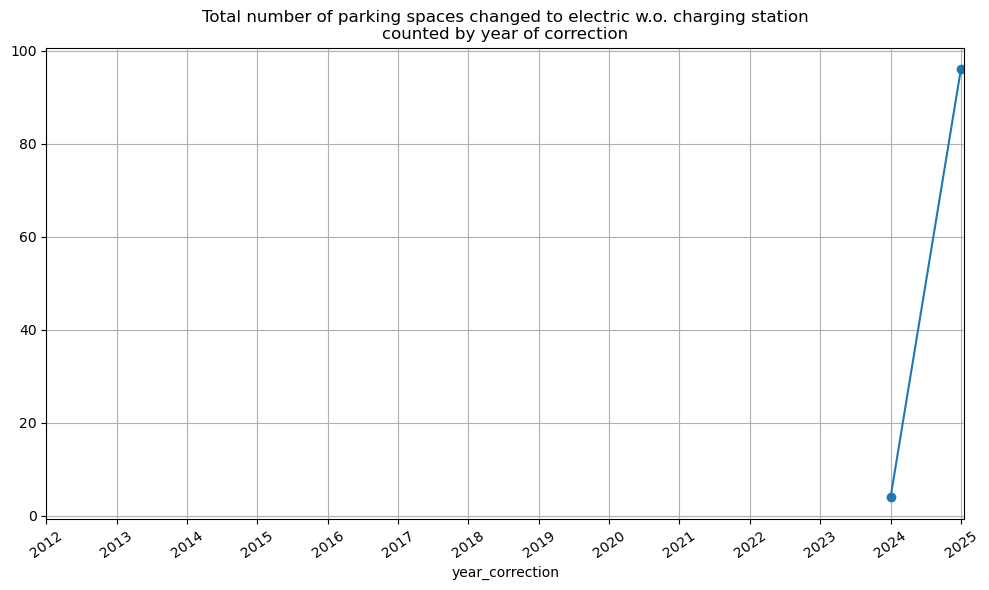

In [84]:
col_of_interest = "year_correction"

# Drop duplicates based on original unique entries
df_unique = df_yearly.drop_duplicates(subset=[col_of_interest, "year_active", "district", "no_of_spaces"])

# Group rows to count the total number of spaces
df_grouped = df_unique.groupby([col_of_interest, "changed_to_electric_parking"])["no_of_spaces"].sum().reset_index()
df_pivot = df_grouped.pivot(index=col_of_interest, columns="changed_to_electric_parking", values="no_of_spaces")
display(df_pivot)

# Plot pivotted dataframe as lines
df_pivot.index = df_pivot[True].index.astype(int)
ax = df_pivot[True].plot(kind="line", marker='o', figsize=(10, 6))
   
# Force all years to show on the x-axis
ax.set_xticks(df_pivot.index)  # these are your actual year values
ax.set_xticklabels(df_pivot.index, rotation=35)  # rotate for readability

# Set title, labels, legeng and grid
plt.grid(visible=True)

plt.title("Total number of parking spaces changed to electric w.o. charging station\ncounted by year of correction")

plt.tight_layout()
plt.show()

In [85]:
df_renamed["changed_to_electric_parking"].value_counts()
# df_renamed[df_renamed["changed_to_electric_parking"]==True]


changed_to_electric_parking
False    28675
True        39
Name: count, dtype: int64